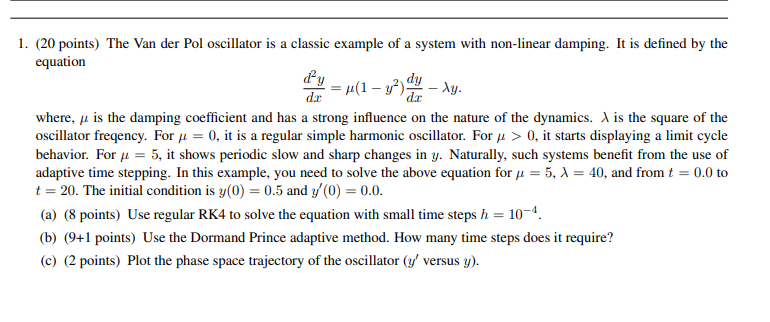

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def osc(y):
    return np.array([y[1],5*(1-y[0]*y[0])*y[1]-40*y[0]])
def rkit(t_in,t_fin,h,y_in,f):
    time_series=np.arange(t_in,t_fin+h,h)
    def rk4(f,h,y):
        ka=h*f(y)
        kb=h*f(y+ka/2)
        kc=h*f(y+kb/2)
        kd=h*f(y+kc)
        return y+(ka+2*kb+2*kc+kd)/6
    cory=np.zeros((len(time_series),2))
    cory[0]=y_in
    for i in range(len(time_series[1:])):
        cory[i+1]=rk4(f,h,cory[i])
    return cory
    

    



In [3]:
phase=rkit(0.0,20.00,10**(-4),np.array([0.5,0.0]),osc)

Text(0, 0.5, 'Position')

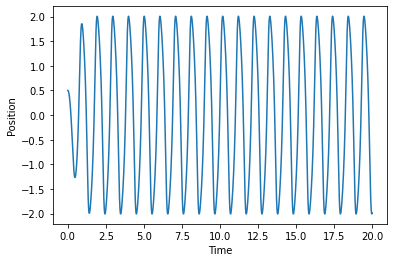

In [4]:
plt.plot(np.arange(0.0,20.0+10**(-4),10**(-4)),phase[:,0],label="Position")
plt.xlabel("Time")
plt.ylabel("Position")

Text(0, 0.5, 'Momentum')

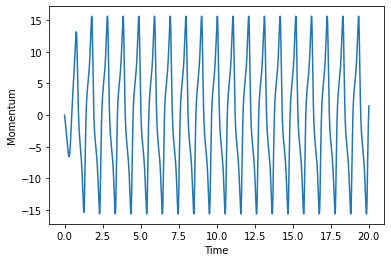

In [5]:
plt.plot(np.arange(0.0,20.0+10**(-4),10**(-4)),phase[:,1],label="Momentum")
plt.xlabel("Time")
plt.ylabel("Momentum")

Text(0.5, 1.0, 'Phase Plot')

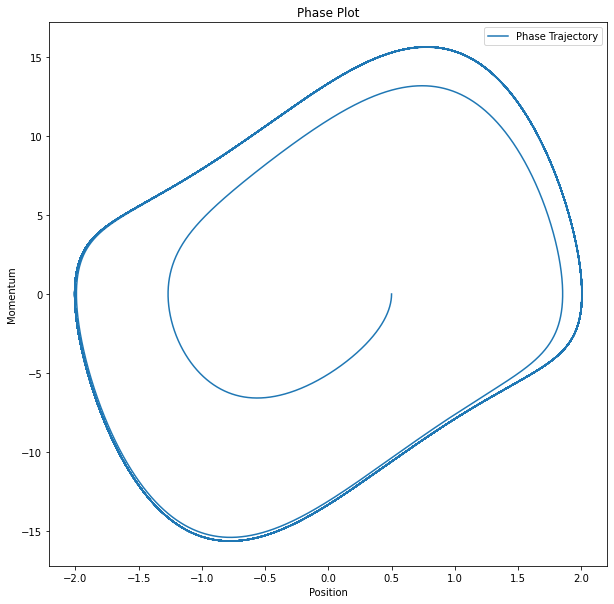

In [29]:
plt.figure(figsize=(10,10))
plt.plot(phase[:,0],phase[:,1],label="Phase Trajectory")
plt.xlabel("Position")
plt.ylabel("Momentum")
plt.legend()
plt.title("Phase Plot")

In [7]:
a2 = 1/5; b21 = 1/5;
a3 = 3/10; b31 = 3/40; b32 = 9/40
a4 = 4/5; b41 = 44/45; b42 = -56/15; b43 = 32/9;
a5 = 8/9; b51 = 19372/6561; b52 = -25360/2187; b53 = 64448/6561; b54 =-212/729;
a6 = 1; b61 = 9017/3168; b62 = -355/33; b63 = 46732/5247; b64 = 49/176;
b65 = -5103/18656;
a7 = 1; b71 = 35/384; b72 = 0; b73 = 500/1113; b74 = 125/192;
b75 = -2187/6784; b76 = 11/84;
c1 = 35/384; c2 = 0; c3 = 500/1113; c4 = 125/192; c5=-2187/6784; c6 = 11/84; c7=0;
c1s = 5179/57600; c2s = 0; c3s = 7571/16695; c4s = 393/640; c5s = -92097/339200;
c6s = 187/2100; c7s = 1/40

In [8]:
def err(f, y, h):
            k1 = h*f(y)
            k2 = h*f(y + b21*k1)
            k3 = h*f(y + b31*k1 + b32*k2)
            k4 = h*f(y + b41*k1 + b42*k2 + b43*k3)
            k5 = h*f(y + b51*k1 + b52*k2 + b53*k3 + b54*k4)
            k6 = h*f(y + b61*k1 + b62*k2 + b63*k3 + b64*k4 + b65*k5)
            y5 = y + c1*k1 + c2*k2 + c3*k3 + c4*k4 + c5*k5 + c6*k6
            k7 = h*f(y5)
            y4 = y + c1s*k1 + c2s*k2 + c3s*k3 + c4s*k4 + c5s*k5 + c6s*k6 + c7s*k7
            return abs(y5-y4)
def rk4(f,h,y):
        ka=h*f(y)
        kb=h*f(y+ka/2)
        kc=h*f(y+kb/2)
        kd=h*f(y+kc)
        return y+(ka+2*kb+2*kc+kd)/6

In [14]:
def adap(t_in,t_fin,h_in,y_in,f,err,abtol,reltol,maxiter,method):
    y = y_in
    h = h_in
    ys =np.zeros((maxiter,2))
    ys[0]=y_in
    i=0
    x=t_in
    while x<= t_fin and i < int(maxiter):
        error=max(err(f,ys[i],h))
        ys[i+1]=method(f,h,ys[i])
        x=x+h
        if i==0:
            tol=abtol
        else:
             tol=abtol+reltol*max(np.linalg.norm(ys[i]),np.linalg.norm(ys[i+1]))
        
    
        h=h*((tol/error)**0.2)
        if h==0:
            h=tol/100
        i=i+1
        
        
    return i,ys[:i]
            
       
        
        
        
        
        
    
    

In [15]:
adap(0.0,20.0,10**(-4),np.array([0.5,0.0]),osc,err,10**(-6),10**(-8),200000,rk4)

(1031,
 array([[ 5.00000000e-01,  0.00000000e+00],
        [ 4.99999900e-01, -2.00037491e-03],
        [ 4.99009376e-01, -2.01448001e-01],
        ...,
        [-1.99495221e+00, -1.42742240e+00],
        [-2.00577967e+00,  3.86043396e-02],
        [-1.99891570e+00,  9.81504043e-01]]))

In [16]:
adap(0.0,20.0,10**(-4),np.array([0.5,0.0]),osc,err,10**(-6),10**(-8),200000,rk4)[1]

array([[ 5.00000000e-01,  0.00000000e+00],
       [ 4.99999900e-01, -2.00037491e-03],
       [ 4.99009376e-01, -2.01448001e-01],
       ...,
       [-1.99495221e+00, -1.42742240e+00],
       [-2.00577967e+00,  3.86043396e-02],
       [-1.99891570e+00,  9.81504043e-01]])

In [17]:
print("The no of steps needed =",adap(0.0,20.0,10**(-4),np.array([0.5,0.0]),osc,err,10**(-6),10**(-8),200000,rk4)[0])

The no of steps needed = 1031


Text(0.5, 1.0, 'Phase_Space_Plot_Using the Apadative Method')

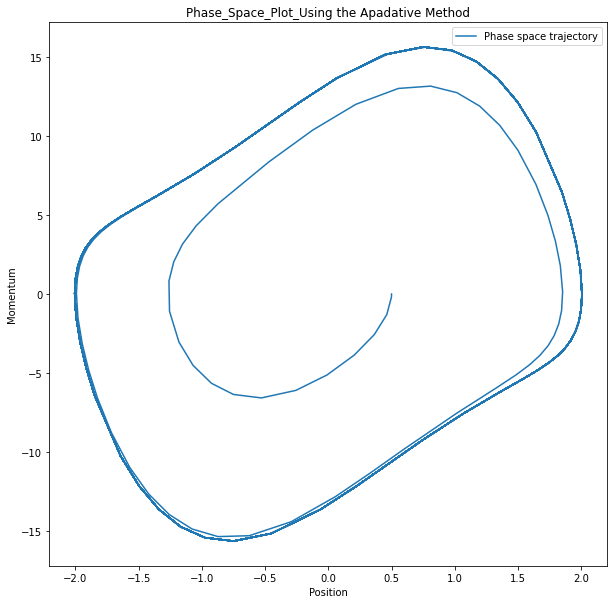

In [27]:
a=adap(0.0,20.0,10**(-4),np.array([0.5,0.0]),osc,err,10**(-6),10**(-8),200000,rk4)[1]
plt.figure(figsize=(10,10))
plt.plot(a[:,0],a[:,1],label="Phase space trajectory")

plt.xlabel("Position")
plt.ylabel("Momentum")
plt.legend()
plt.title("Phase_Space_Plot_Using the Apadative Method")